<a href="https://colab.research.google.com/github/nikhil1205-ai/Laptop-Price-Predictor_by_Ac/blob/Improving_Accu%2FLaptop_prediction%2FAc/Model/laptop_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Business Problem


Predict the Price of laptop on the basis of

Context A dataset for 1300 laptop models.

Content, Company Name, Product Name, Laptop Type, Screen Inches, Screen Resolution, CPU Model, RAM Characteristics, Memory, GPU Characteristics, Operating System, Laptop's Weight, Laptop's Price

## Data Preprocessing

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd


In [2]:
# Load the dataset
df = pd.read_csv('laptop_data.csv')

In [3]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [4]:
# View basic info and check for duplicates or missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [5]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [7]:
  # Removing unwanted columns
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df["Weight"].unique()

array(['1.37kg', '1.34kg', '1.86kg', '1.83kg', '2.1kg', '2.04kg', '1.3kg',
       '1.6kg', '2.2kg', '0.92kg', '1.22kg', '0.98kg', '2.5kg', '1.62kg',
       '1.91kg', '2.3kg', '1.35kg', '1.88kg', '1.89kg', '1.65kg',
       '2.71kg', '1.2kg', '1.44kg', '2.8kg', '2kg', '2.65kg', '2.77kg',
       '3.2kg', '0.69kg', '1.49kg', '2.4kg', '2.13kg', '2.43kg', '1.7kg',
       '1.4kg', '1.8kg', '1.9kg', '3kg', '1.252kg', '2.7kg', '2.02kg',
       '1.63kg', '1.96kg', '1.21kg', '2.45kg', '1.25kg', '1.5kg',
       '2.62kg', '1.38kg', '1.58kg', '1.85kg', '1.23kg', '1.26kg',
       '2.16kg', '2.36kg', '2.05kg', '1.32kg', '1.75kg', '0.97kg',
       '2.9kg', '2.56kg', '1.48kg', '1.74kg', '1.1kg', '1.56kg', '2.03kg',
       '1.05kg', '4.4kg', '1.90kg', '1.29kg', '2.0kg', '1.95kg', '2.06kg',
       '1.12kg', '1.42kg', '3.49kg', '3.35kg', '2.23kg', '4.42kg',
       '2.69kg', '2.37kg', '4.7kg', '3.6kg', '2.08kg', '4.3kg', '1.68kg',
       '1.41kg', '4.14kg', '2.18kg', '2.24kg', '2.67kg', '2.14kg',
       '1.

In [9]:
# Handling columns with missing or invalid data
df['Ram']= df['Ram'].str.replace('GB', '')  # Remove 'GB' and convert to integer
df['Weight'] = df['Weight'].str.replace('kg', '')   # Remove 'kg' and convert to float


In [10]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [11]:
# Convert 'Ram' column to int32 and 'Weight' column to float32 for appropriate data type handling
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [12]:
df["Company"]

,Company
0,Apple
1,Apple
2,HP
3,Apple
4,Apple
...,...
1298,Lenovo
1299,Lenovo
1300,Lenovo
1301,HP


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## Exploratory Data Analysis

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

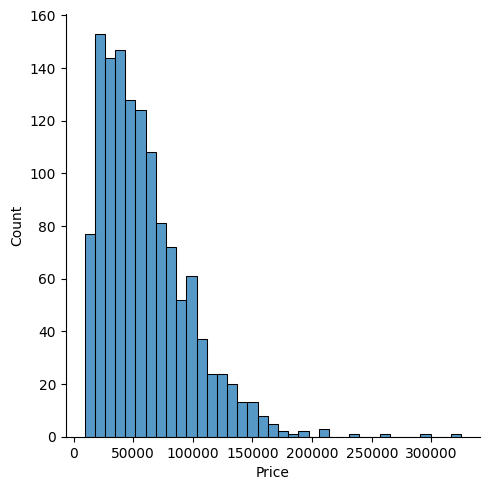

In [15]:
## Plotting a distribution of the 'Price' column to visualize its frequency distribution
sns.displot(df['Price'])

<Axes: xlabel='Company'>

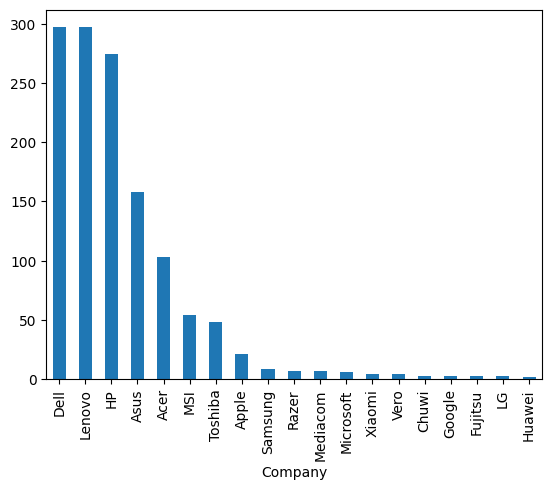

In [16]:
df['Company'].value_counts().plot(kind='bar')

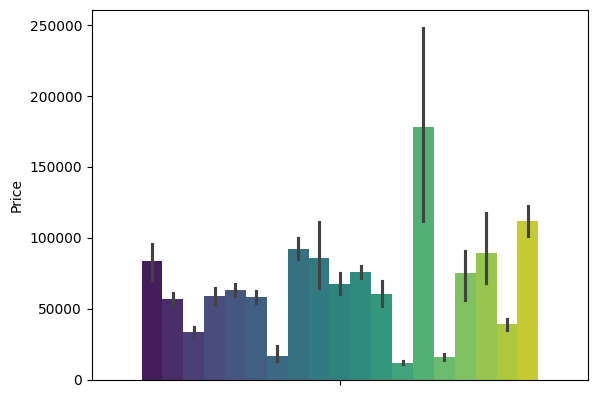

In [17]:
## Creating a bar plot showing the relationship between 'Company' and 'Price', using a 'viridis' color palette and vertical x-axis labels
sns.barplot(hue=df['Company'], y=df['Price'], palette="viridis",legend=False)  # Use a palette for colorful bars
plt.xticks(rotation='vertical')
plt.show()



<Axes: xlabel='TypeName'>

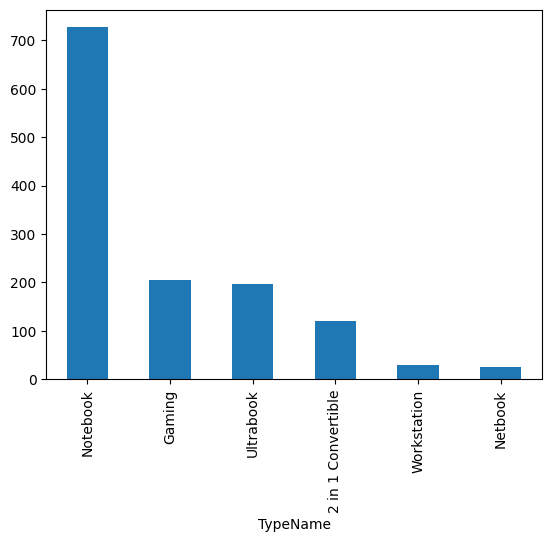

In [18]:
## Plotting a bar chart showing the frequency distribution of different values in the 'TypeName' column
df['TypeName'].value_counts().plot(kind='bar')

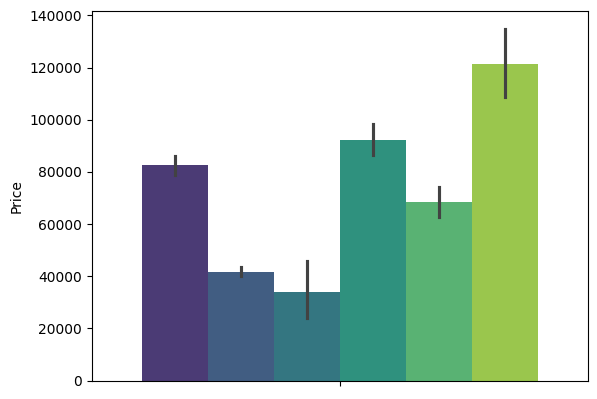

In [19]:
# Creating a bar plot to show the relationship between 'TypeName' and 'Price', with a 'viridis' color palette
sns.barplot(hue=df['TypeName'], y=df['Price'], palette="viridis",legend=False)
plt.xticks(rotation='vertical')
plt.show()

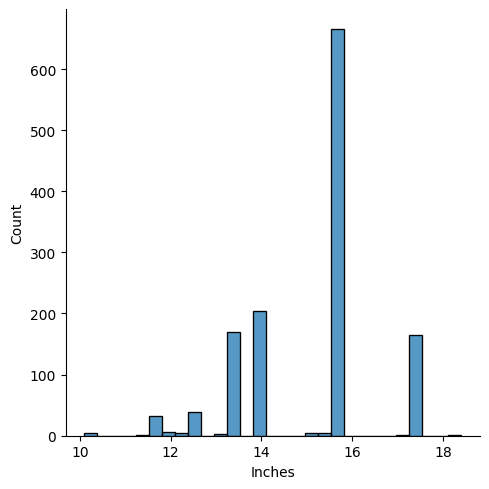

In [20]:
sns.displot(df['Inches'])

<Axes: xlabel='Inches', ylabel='Price'>

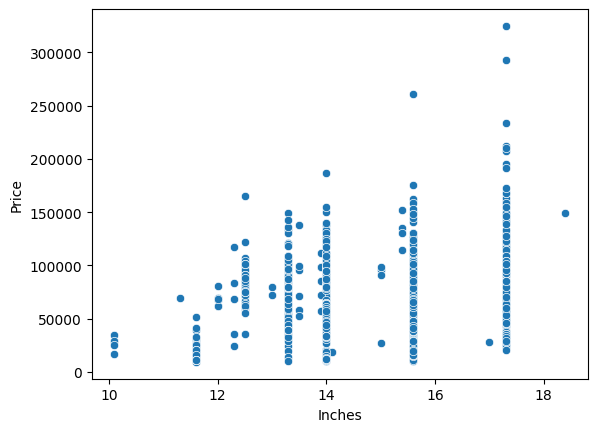

In [21]:
sns.scatterplot(x=df['Inches'], y=df['Price'])

In [22]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


In [23]:
#Creating a new column 'TouchScreen' where 1 indicates a touchscreen and 0 indicates no touchscreen, based on the presence of 'Touchscreen' in the 'ScreenResolution' column
df['TouchScreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [24]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0


In [25]:
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen
716,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7300U 2.6GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.90,62817.12,0
9,Acer,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8,256GB SSD,Intel UHD Graphics 620,Windows 10,1.60,41025.60,0
621,Lenovo,Notebook,14.0,Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 7,1.65,78055.20,0
258,MSI,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.14,133146.72,0
640,Lenovo,Gaming,15.6,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050M,Windows 10,2.50,59087.52,0


<Axes: xlabel='TouchScreen'>

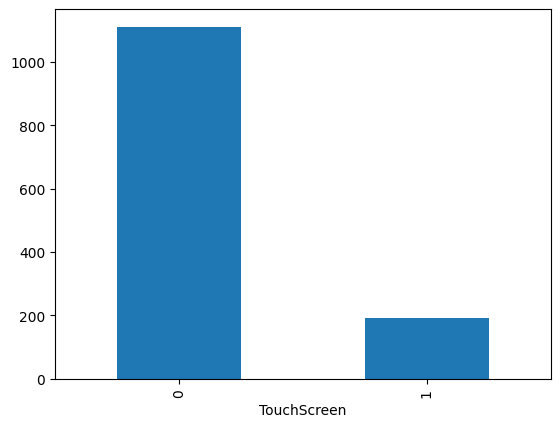

In [26]:
#Plotting a bar chart showing the count of touchscreen vs non-touchscreen devices based on the 'TouchScreen' column
df['TouchScreen'].value_counts().plot(kind='bar')

<Axes: ylabel='Price'>

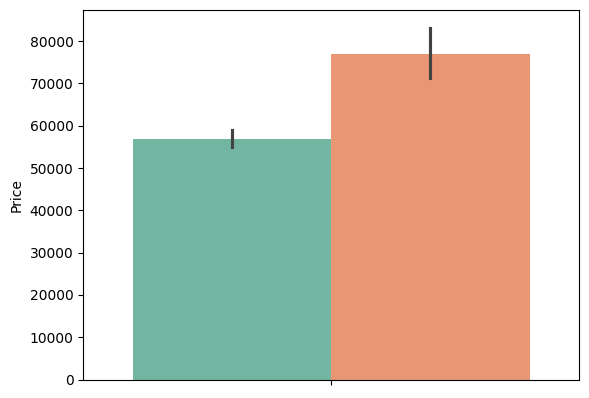

In [27]:
# Creating a bar plot to show the average price of touchscreen vs non-touchscreen devices using 'TouchScreen' and 'Price' columns, with 'Set2' color palette
sns.barplot(hue=df['TouchScreen'], y=df['Price'], palette= 'Set2',legend=False)

In [28]:
# Creating a new column 'IPS' by checking if the 'ScreenResolution' contains 'IPS'; assign 1 if True, otherwise 0
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [29]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='IPS'>

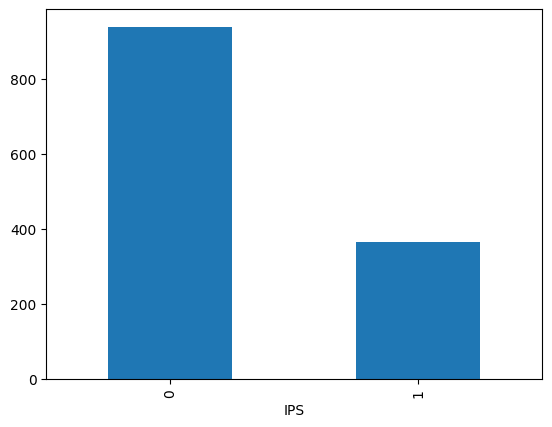

In [30]:
# Plotting a bar chart to visualize the distribution of the 'IPS' column values (0 and 1)
df['IPS'].value_counts().plot(kind='bar')

In [31]:
#Splitting the 'ScreenResolution' column into two new columns based on the 'x' separator,
# and assigning the result to a new variable 'new' with two columns (width and height)

new = df['ScreenResolution'].str.split('x', n=1, expand=True)

In [32]:
# Assigning the first column (width) of the 'new' DataFrame to 'X_res' and
#the second column (height) to 'Y_res' in the original DataFrame

df['X_res'] = new[0]
df['Y_res'] = new[1]

In [33]:
#checking again
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [34]:
# Cleaning the 'X_res' column by removing commas, extracting numeric values, and
# keeping only the first value in each list using regex

df['X_res']  = df['X_res'].str.replace(',', '').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])

In [35]:
df.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [36]:
#Convering the 'X_res' and 'Y_res' columns to integer type for further analysis
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Inches            1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  TouchScreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [38]:
# Calculating the pixel per inch (PPI) for each laptop based on screen resolution and screen size
df['ppi']= (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float')

In [39]:
# Ensuring 'Price' is numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Droping non-numeric columns and compute correlation
correlation = df.select_dtypes(include=['number']).corr()
print(correlation['Price'])

Inches         0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
TouchScreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
ppi            0.473487
Name: Price, dtype: float64


In [40]:
# Droping the 'ScreenResolution' column as it's no longer needed after extracting relevant features
df.drop(columns=['ScreenResolution'], inplace=True)

In [41]:
# Droping the 'Inches', 'X_res', and 'Y_res' columns as they are no longer needed after calculating PPI
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)

In [42]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [43]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core M M3-6Y30 0.9GHz,1
AMD A9-Series 9420 2.9GHz,1
Intel Core i3 6006U 2.2GHz,1


In [44]:
#Extracting the first three words from the 'Cpu' column to create a simplified 'Cpu Name' column
df['Cpu Name']= df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [45]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [46]:
# Classifying processor names into Intel (i7, i5, i3), other Intel, or AMD categories

def fetch_processor(text):
  if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
    return text
  else:
    if text.split()[0] == 'Intel':
      return 'Other Intel Processor'
    else:
      return 'AMD Processor'


In [47]:
# Applying the fetch_processor function to create a new column 'CPU Brand' based on the 'Cpu Name'
df['CPU Brand'] = df['Cpu Name'].apply(fetch_processor)

In [48]:
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,Cpu Name,CPU Brand
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,Intel Core i5


<Axes: xlabel='CPU Brand'>

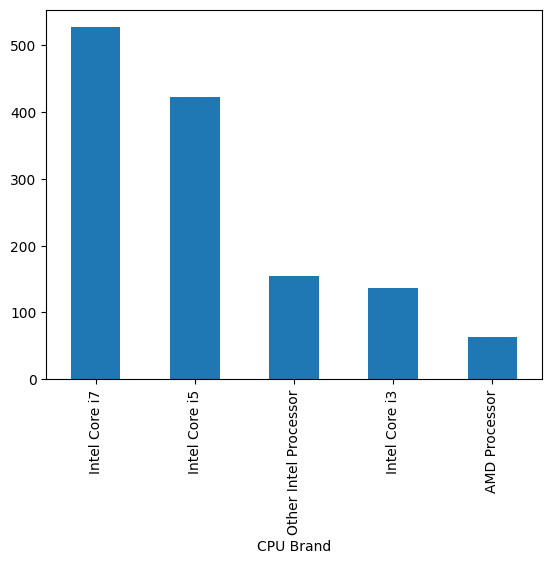

In [49]:
# Plots a bar chart showing the count of each unique 'CPU Brand'

df['CPU Brand'].value_counts().plot(kind='bar')

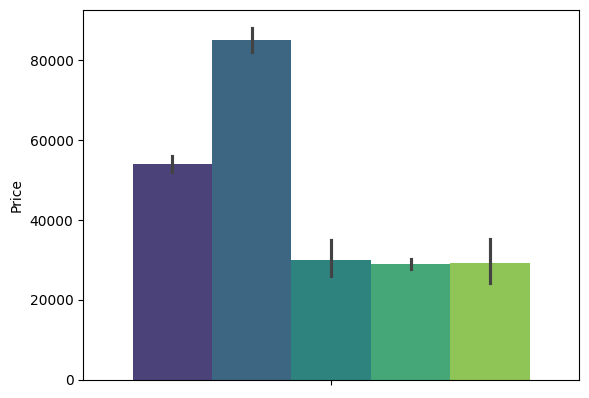

In [50]:
# Creating a bar plot to visualize the relationship between 'CPU Brand' and 'Price' using the 'viridis' color palette

sns.barplot(hue=df['CPU Brand'], y=df['Price'], palette='viridis',legend=False)
plt.xticks(rotation='vertical')
plt.show()

In [51]:
# Droping the 'Cpu' and 'Cpu Name' columns from the DataFrame

df.drop(columns=['Cpu','Cpu Name'], inplace=True)

In [52]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

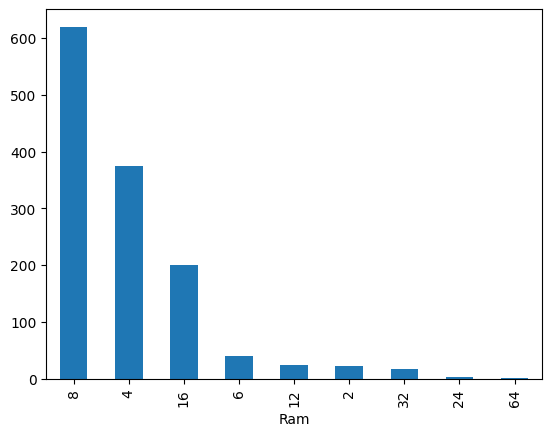

In [53]:
# Ploting a bar chart showing the count of each unique value in the 'Ram' column

df['Ram'].value_counts().plot(kind='bar')

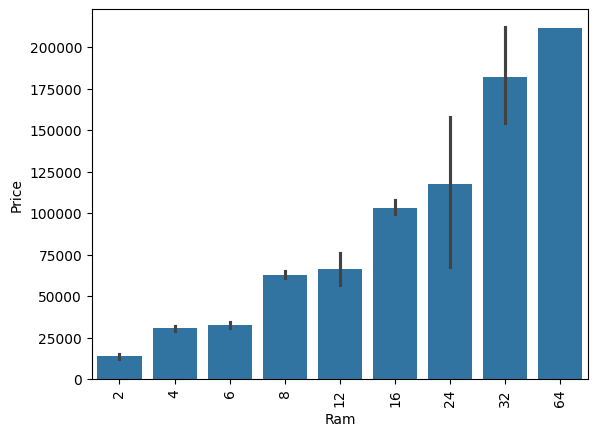

In [54]:
# Creating a bar plot to visualize the relationship between 'Ram' and 'Price', with 'Ram' on the x-axis and 'Price' on the y-axis

sns.barplot(x=df['Ram'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [55]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [56]:
# Preprocess 'Memory' column
df["Memory"] = df["Memory"].astype(str).replace(r'\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')
new = df["Memory"].str.split("+", n=1, expand=True)

# Extract 'first' and 'second' storage components
df["first"] = new[0].str.strip()
df["second"] = new[1]

# Extract storage type from 'first'
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

# Extract numeric values from 'first'
df["first"] = df["first"].str.extract(r'(\d+)').fillna("0").astype(int)

# Extract storage type from 'second' before cleaning
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if isinstance(x, str) and "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if isinstance(x, str) and "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if isinstance(x, str) and "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if isinstance(x, str) and "Flash Storage" in x else 0)

# Extract numeric values from 'second'
df["second"] = df["second"].str.extract(r'(\d+)').fillna("0").astype(int)

# Compute total sizes for each storage type
df["HDD"] = (df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"])
df["SSD"] = (df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"])
df["Hybrid"] = (df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"])
df["Flash_Storage"] = (df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"])

# Drop intermediate columns
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
                 'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
                 'Layer2Flash_Storage'], inplace=True)


In [57]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,0,128
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [58]:
# Dropping the 'Memory' column from the DataFrame

df.drop(columns=['Memory'], inplace=True)

In [59]:
# Ensure 'Price' is numeric
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Drop non-numeric columns and compute correlation
correlation = df.select_dtypes(include=['number']).corr()
print(correlation['Price'])

Ram              0.743007
Weight           0.210370
Price            1.000000
TouchScreen      0.191226
IPS              0.252208
ppi              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64


In [60]:
# Droping the 'Hybrid' and 'Flash_Storage' columns from the DataFrame

df.drop(columns=['Hybrid','Flash_Storage'], inplace=True)

In [61]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [62]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
AMD Radeon R5 520,1
AMD Radeon R7,1
Intel HD Graphics 540,1


In [63]:
# Extracting the first word from the 'Gpu' column and assigns it as the 'GPU Brand'

df['GPU Brand']= df['Gpu'].apply(lambda x:x.split()[0])

In [64]:
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


<Axes: xlabel='GPU Brand'>

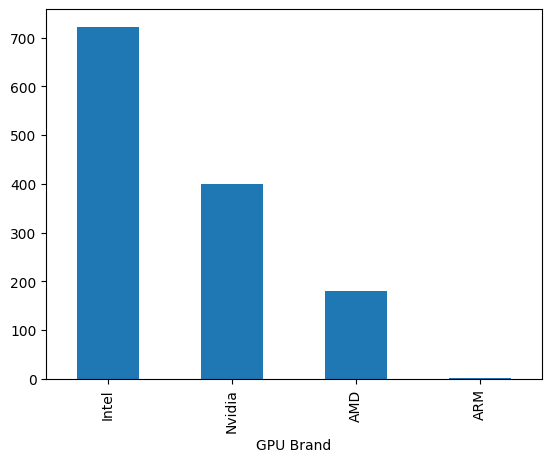

In [65]:
# Plotting the frequency distribution of unique GPU brands as a bar chart

df['GPU Brand'].value_counts().plot(kind='bar')

In [66]:
#Filtering out rows where the 'GPU Brand' is 'ARM' from the DataFrame

df = df[df['GPU Brand'] != 'ARM']

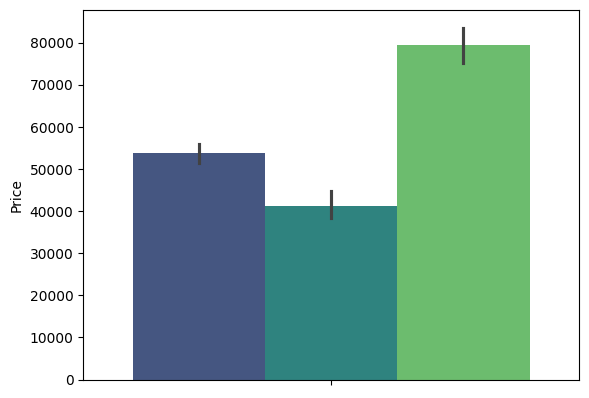

In [67]:
sns.barplot(hue=df['GPU Brand'], y=df['Price'], palette='viridis',legend=False)
plt.xticks(rotation='vertical')
plt.show()

In [68]:
df.drop(columns=['Gpu'], inplace=True)

In [69]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [70]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


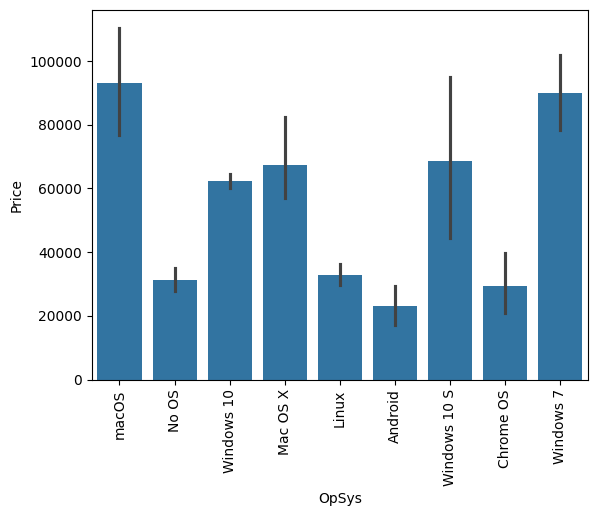

In [71]:
sns.barplot(x=df['OpSys'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [72]:
# Defining a function 'cat_os' to categorize the OS into 'Windows', 'Mac', or 'Others/No OS/Linux' based on the input value

def cat_os(inp):
  if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
    return 'Windows'
  elif inp == 'macOS' or inp == 'Mac OS X':
    return 'Mac'
  else:
    return 'Others/No OS/Linux'

In [73]:
df['os'] = df['OpSys'].apply(cat_os)

In [74]:
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [75]:
df.drop(columns=['OpSys'], inplace=True)

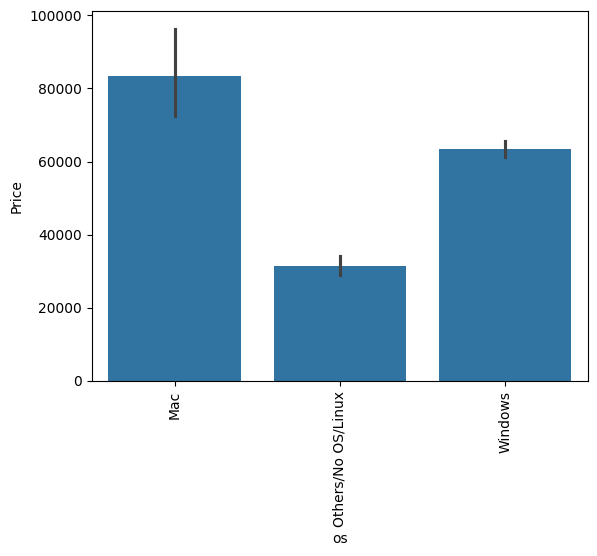

In [76]:
sns.barplot(x=df['os'], y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

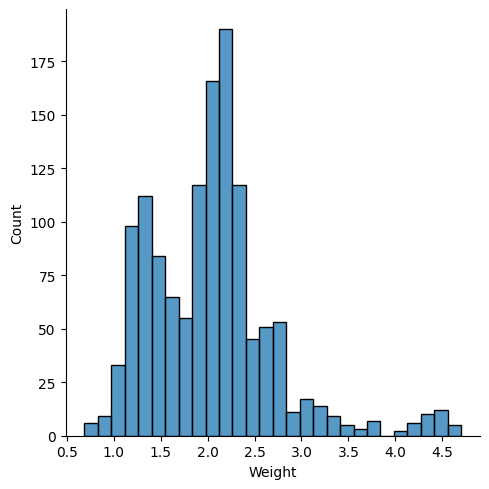

In [77]:
# Ploting the distribution of the 'Weight' column in the DataFrame using a histogram with a KDE (Kernel Density Estimate) curve

sns.displot(df['Weight'])

<Axes: xlabel='Weight', ylabel='Price'>

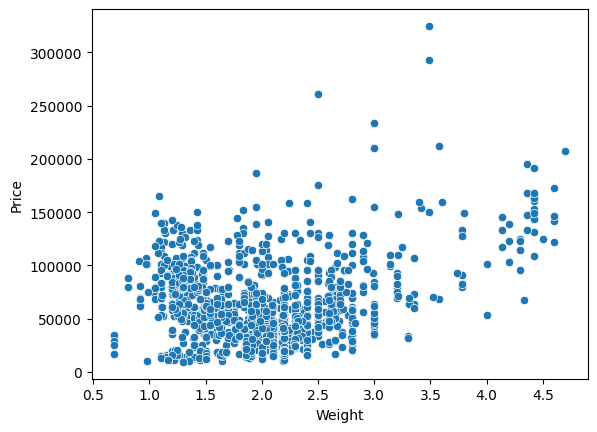

In [78]:
# Creating a scatter plot showing the relationship between 'Weight' and 'Price'

sns.scatterplot(x=df['Weight'], y=df['Price'])

<Axes: >

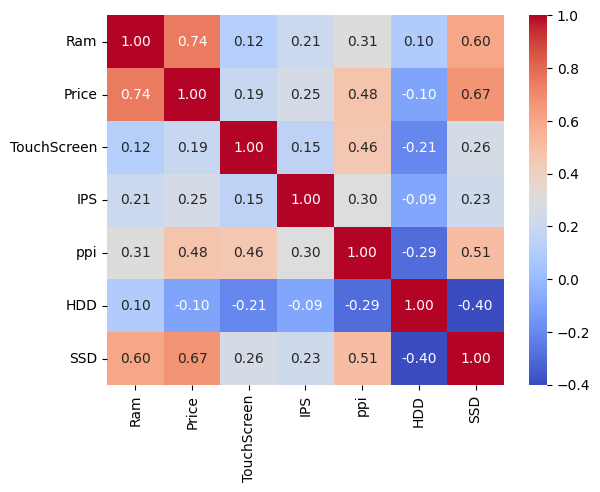

In [79]:
# Selecting columns with numeric data types (int and float) and generates a heatmap of their correlation matrix

numeric_df = df.select_dtypes(include=['float64', 'int64','int32'])
sns.heatmap(numeric_df.corr(),annot=True, fmt=".2f", cmap="coolwarm", cbar=True)


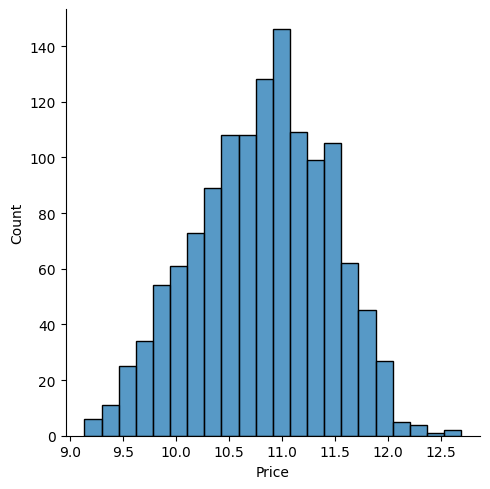

In [80]:
# Ploting a histogram of the log-transformed 'Price' column to reduce skewness and visualize the distribution

sns.displot(np.log(df['Price']))

In [81]:
# Splitting the dataset into features (X) and target variable (y). The 'Price' column is dropped from X,
# and the natural logarithm of 'Price' is taken for y to reduce skewness.

X = df.drop(columns='Price')
y = np.log(df['Price'])

In [82]:
df

,Company,TypeName,Ram,Weight,Price,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


## Model Training & Evaluation

In [ ]:
!pip install optuna

In [86]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score

In [87]:
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor
from sklearn.svm import SVR
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import optuna

In [132]:
X = df.drop(columns='Price')
y = np.log(df['Price'])


In [190]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='ignore'), [0, 1, 7, 8,10, 11]),
    ("col_standardscaler",MinMaxScaler(),[2,3,4,5,6,9])
], remainder='passthrough')
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=2)

In [181]:
X

,Company,TypeName,Ram,Weight,TouchScreen,IPS,ppi,CPU Brand,HDD,SSD,GPU Brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


### Random Forest

In [ ]:
#Random Forest

step2 = RandomForestRegressor(n_estimators= 166, max_depth=14, min_samples_split= 3, min_samples_leaf= 2, max_features= None, bootstrap=True, criterion="squared_error", max_samples=0.6761229162996046)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8851021716167996
MAE: 0.16000949996545297


In [ ]:
def objective(trial):
    n_estimators = trial.suggest_int("n_estimators", 50, 300)
    max_depth = trial.suggest_int("max_depth", 3, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    bootstrap = trial.suggest_categorical("bootstrap", [True, False])
    criterion = trial.suggest_categorical("criterion", ["squared_error", "absolute_error", "poisson"])
    max_samples = trial.suggest_float("max_samples", 0.5, 1.0) if bootstrap else None

    step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='ignore'), [0, 1, 7, 10, 11]),
    ("col_standardscaler",StandardScaler(),[2,3,4,5,6,8,9])
    ], remainder='passthrough')

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=2)

    step2 = RandomForestRegressor(
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        bootstrap=bootstrap,
        criterion=criterion,
        max_samples=max_samples,
        random_state=42,
        n_jobs=-1
    )

    pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
    ])
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)


[I 2025-01-17 11:40:53,511] A new study created in memory with name: no-name-27b7b6d7-d63e-45a6-a6bb-9ef12721ff7b
[I 2025-01-17 11:40:59,572] Trial 0 finished with value: 0.7971397442039575 and parameters: {'n_estimators': 85, 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 16, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'absolute_error'}. Best is trial 0 with value: 0.7971397442039575.
[I 2025-01-17 11:41:00,184] Trial 1 finished with value: 0.7980059610164214 and parameters: {'n_estimators': 77, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 3, 'max_features': 'sqrt', 'bootstrap': False, 'criterion': 'squared_error'}. Best is trial 1 with value: 0.7980059610164214.
[I 2025-01-17 11:41:02,085] Trial 2 finished with value: 0.7066670561158878 and parameters: {'n_estimators': 170, 'max_depth': 3, 'min_samples_split': 3, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'bootstrap': True, 'criterion': 'poisson', 'max_samples': 0.8736106729318107}. Best i

KeyboardInterrupt: 

In [ ]:
print("Best hyperparameters:", study.best_params)
print("Best score (MSE):", study.best_value)

### Regression/KNN/Decision Trees/SVM/Ada Boost

In [ ]:
#Linear Regression

step2 = LinearRegression()

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8073277448418577
MAE: 0.21017827976428832


In [ ]:
#Ridge Regression


step2 = Ridge(alpha=10)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.7968582371827541
MAE: 0.21849219496822342


In [ ]:
#Lasso Regression



step2 = Lasso(alpha=0.001)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8055032021556925
MAE: 0.21123213822654766


In [ ]:
#KNN


step2 = KNeighborsRegressor(n_neighbors=3)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8244447725314307
MAE: 0.1913355632835798


In [152]:
#Decision Trees

step2 = DecisionTreeRegressor(max_depth=7)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.843805775082618
MAE: 0.18609851647043293


In [175]:
#Support Vector

step2 = SVR(kernel='poly
', C=10000, epsilon=0.1)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: -0.3805680152010569
MAE: 0.4130999346103025


In [163]:
#Ada Boost

step2 = AdaBoostRegressor(n_estimators=15, learning_rate=0.8)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.7867519436621356
MAE: 0.23423459317977982


### Gradient Boosting

In [ ]:
#Gradient-Boosting
step2 = GradientBoostingRegressor(n_estimators= 368, learning_rate= 0.03410581765180131, max_depth= 11, min_samples_split=18, min_samples_leaf= 1, max_features= None, subsample=0.5546853990892547, loss= 'squared_error', alpha=0.7365294682470245, min_impurity_decrease= 0.024055486428414857, validation_fraction=0.20937510479772573)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.896444271713908
MAE: 0.14889528213281714


In [ ]:
def objective(trial):

    n_estimators = trial.suggest_int("n_estimators", 50, 500)
    learning_rate = trial.suggest_float("learning_rate", 0.01, 0.3, log=True)
    max_depth = trial.suggest_int("max_depth", 3, 20)
    min_samples_split = trial.suggest_int("min_samples_split", 2, 20)
    min_samples_leaf = trial.suggest_int("min_samples_leaf", 1, 20)
    max_features = trial.suggest_categorical("max_features", ["sqrt", "log2", None])
    subsample = trial.suggest_float("subsample", 0.5, 1.0)
    loss = trial.suggest_categorical("loss", ["squared_error", "absolute_error", "huber", "quantile"])
    alpha = trial.suggest_float("alpha", 0.1, 0.9)
    min_impurity_decrease = trial.suggest_float("min_impurity_decrease", 0.0, 0.1)
    validation_fraction = trial.suggest_float("validation_fraction", 0.1, 0.3)

    step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(drop='first', handle_unknown='ignore'), [0, 1, 7, 8, 9, 10, 11]),
    ("col_standardscaler",MinMaxScaler(),[2,3,4,5,6])
    ], remainder='passthrough')

    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=2)

    step2 = GradientBoostingRegressor(
        n_estimators=n_estimators,
        learning_rate=learning_rate,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        subsample=subsample,
        loss=loss,
        alpha=alpha,
        min_impurity_decrease=min_impurity_decrease,
        validation_fraction=validation_fraction,
        random_state=42   )


    pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
    ])
    scores = cross_val_score(pipe, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)
    return scores.mean()

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)


[I 2025-01-17 11:48:12,055] A new study created in memory with name: no-name-175acd27-de69-45d7-bf49-5faed3a87e48
[I 2025-01-17 11:48:16,907] Trial 0 finished with value: 0.7665485083193919 and parameters: {'n_estimators': 99, 'learning_rate': 0.03012813572865357, 'max_depth': 17, 'min_samples_split': 13, 'min_samples_leaf': 15, 'max_features': None, 'subsample': 0.9849547609336352, 'loss': 'huber', 'alpha': 0.1264654726208126, 'min_impurity_decrease': 0.04835531610596803, 'validation_fraction': 0.21985478490868426}. Best is trial 0 with value: 0.7665485083193919.
[I 2025-01-17 11:48:20,900] Trial 1 finished with value: 0.813656059127022 and parameters: {'n_estimators': 308, 'learning_rate': 0.27117008512475016, 'max_depth': 10, 'min_samples_split': 15, 'min_samples_leaf': 19, 'max_features': None, 'subsample': 0.7607581138206008, 'loss': 'huber', 'alpha': 0.28088872774607887, 'min_impurity_decrease': 0.0438075213478611, 'validation_fraction': 0.12792316075885696}. Best is trial 1 with

In [ ]:
print("Best hyperparameters:", study.best_params)
print("Best score (MSE):", study.best_value)

Best hyperparameters: {'n_estimators': 452, 'learning_rate': 0.11550121617931451, 'max_depth': 16, 'min_samples_split': 8, 'min_samples_leaf': 5, 'max_features': 'log2', 'subsample': 0.5968535610268689, 'loss': 'squared_error', 'alpha': 0.5692466056190406, 'min_impurity_decrease': 0.02810878158743743, 'validation_fraction': 0.28788732826661595}
Best score (MSE): 0.8773555029948925


In [ ]:
#exporting the files

import pickle

pickle.dump(df,open('df_model.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

### Ensemble Technique

In [166]:
from sklearn import ensemble

In [188]:
lis=[("RF",RandomForestRegressor(n_estimators= 166, max_depth=14, min_samples_split= 3, min_samples_leaf= 2, max_features= None, bootstrap=True, criterion="squared_error", max_samples=0.6761229162996046)),
     ("GB",GradientBoostingRegressor(n_estimators= 368, learning_rate= 0.03410581765180131, max_depth= 11, min_samples_split=18, min_samples_leaf= 1, max_features= None, subsample=0.5546853990892547, loss= 'squared_error', alpha=0.7365294682470245, min_impurity_decrease= 0.024055486428414857, validation_fraction=0.20937510479772573)),
     ("DT",DecisionTreeRegressor(max_depth=7))]
step2=ensemble.VotingRegressor(lis)

In [189]:
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)
print('R2 Score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 Score: 0.8839639203034023
MAE: 0.15836411775430248


In [192]:
X_train.shape

(1106, 12)

### Neural Network

In [268]:
import numpy as np
import tensorflow as tf
from keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,BatchNormalization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2

In [269]:
one_hot=OneHotEncoder(drop='first', handle_unknown='ignore',sparse_output=False)
one_data=one_hot.fit_transform(df.iloc[:,[0, 1, 8, 11,12]])
categories=one_hot.get_feature_names_out()

num=df.iloc[:,[2,3,5,6,7,9,10]].to_numpy()
X=np.hstack([one_data,num])

st=MinMaxScaler()
X=st.fit_transform(X)
y = np.log(df['Price'])

In [270]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.1, random_state=2)

In [271]:
model=Sequential()
model.add(Dense(256, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(256, activation='relu',kernel_regularizer=l2(0.01)))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['r2_score'])
history=model.fit(X_train, y_train, epochs=300, batch_size=100, validation_split=0.2,callbacks=[early_stopping], verbose=1)

Epoch 1/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 8s 110ms/step - loss: 116.0573 - r2_score: -274.6818 - val_loss: 25.2261 - val_r2_score: -40.9957
Epoch 2/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 18.3995 - r2_score: -26.1070 - val_loss: 13.9475 - val_r2_score: -14.9027
Epoch 3/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 11.0498 - r2_score: -8.0192 - val_loss: 9.6854 - val_r2_score: -6.1592
Epoch 4/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 8.3435 - r2_score: -3.0653 - val_loss: 7.7713 - val_r2_score: -2.9771
Epoch 5/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 6.9166 - r2_score: -1.0972 - val_loss: 6.4232 - val_r2_score: -0.9005
Epoch 6/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 6.0549 - r2_score: -0.2899 - val_loss: 5.6236 - val_r2_score: 0.0587
Epoch 7/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 5.4798 - r2_score: 0.1804 - val_loss: 5.1880 - val_r2_score: 0.3098
Epoch 8/300
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 5.0852 - r2_score: 0.

In [ ]:
plt.plot(history.history["val_r2_score"][15:])


In [ ]:
plt.plot(history.history["val_loss"])

## predict

In [ ]:
import pickle

#pickle.dump(df,open('df_model.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))

In [ ]:
mod=pickle.load(open("/content/model.pkl","rb"))

In [ ]:
X_train[0].reshape(-1,1).shape

(38, 1)

In [ ]:
[X_test[0]]

[array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        1.        , 0.        , 0.        , 0.        , 1.        ,
        0.        , 0.        , 1.        , 0.        , 0.        ,
        1.        , 0.03225806, 0.19950126, 0.        , 1.        ,
        0.28657483, 0.25      , 0.        ])]

In [ ]:
mod.predict([X_test[0].reshape(1, 38)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step


array([[10.362044]], dtype=float32)

In [ ]:
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_61 (Dense)                     │ (None, 64)                  │           2,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_62 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_63 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_64 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_65 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_66 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_67 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_68 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_69 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_70 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 107,525 (420.02 KB)

 Trainable params: 35,841 (140.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 71,684 (280.02 KB)